# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from chart_studio import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter
from sklearn.tree import DecisionTreeClassifier

# Assignment 8: DT

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (best `depth` in range [1, 5, 10, 50, 100, 500, 100], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li> 
        </ul>
    </li>
    <br>
    <li><strong>Graphviz</strong>
        <ul>
    <li>Visualize your decision tree with Graphviz. It helps you to understand how a decision is being made, given a new vector.</li>
    <li>Since feature names are not obtained from word2vec related models, visualize only BOW & TFIDF decision trees using Graphviz</li>
    <li>Make sure to print the words in each node of the decision tree instead of printing its index.</li>
    <li>Just for visualization purpose, limit max_depth to 2 or 3 and either embed the generated images of graphviz in your notebook, or directly upload them as .png files.</li>                
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud <a href='https://www.geeksforgeeks.org/generating-word-cloud-python/' with the words of eassy text of these `false positive data points`>WordCloud</a></li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2]</strong>
        <ul>
    <li> Select 5k best features from features of <font color='red'>Set 2</font> using<a href='https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'>`feature_importances_`</a>, discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3</li>
        </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h1>2. Decision Tree </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [3]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split # replace the cross_validation by model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score # replace the cross_validation by model_selection
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import model_selection # replace the cross_validation by model_selection

In [4]:
project_data = pd.read_csv('train_data.csv')
resources_data = pd.read_csv('resources.csv')

y = project_data['project_is_approved']
X = project_data.drop("project_is_approved" , axis=1)


#https://stackoverflow.com/questions/36997619/sklearn-stratified-sampling-based-on-a-column
# split the Project data set into train and test
X_1, X_test,y_1, y_test = model_selection.train_test_split( X, y, test_size=0.3, random_state=42, stratify=y)
# split the train data set into cross validation train and cross validation test
X_tr, X_cv,y_tr, y_cv = model_selection.train_test_split(X_1,y_1, test_size=0.3 )

# split the Project data set into train and test
A_1, A_test = model_selection.train_test_split(resources_data, test_size=0.3, random_state=0)
# split the train data set into cross validation train and cross validation test
A_tr, A_cv = model_selection.train_test_split(A_1, test_size=0.3)
X_tr = X_tr.replace(np.nan, '', regex=True)
X_cv = X_cv.replace(np.nan, '', regex=True)
X_test = X_test.replace(np.nan, '', regex=True)

A_tr = A_tr.replace(np.nan, '', regex=True)
A_cv = A_cv.replace(np.nan, '', regex=True)
A_test = A_test.replace(np.nan, '', regex=True)
#print(X_tr.head())



<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

<h3> 2.2.1 Encoding for feature 'project_subject_categories' on training dataset </h3>

In [5]:
# Encoding the project_subject_categories
catogories = list(X_tr['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
X_tr['clean_categories'] = cat_list
X_tr.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in X_tr['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))

from sklearn.feature_extraction.text import CountVectorizer
vectorizer1 = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
categories_one_hot_train = vectorizer1.fit_transform(X_tr['clean_categories'].values)
print(vectorizer1.get_feature_names())
print("Shape of matrix after one hot encodig ",categories_one_hot_train.shape)



['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (53531, 9)


In [6]:
vector1=vectorizer1.get_feature_names()

<h3> Encoding for feature 'project_subject_categories' on CV dataset </h3>

In [7]:
# Encoding the project_subject_categories
catogories = list(X_cv['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
X_cv['clean_categories'] = cat_list
X_cv.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in X_cv['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
#Applying transform() function for CV data 
categories_one_hot_cv = vectorizer.transform(X_cv['clean_categories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",categories_one_hot_cv.shape)



['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (22942, 9)


<h3> Encoding for feature 'project_subject_categories' on test dataset </h3>

In [8]:
# Encoding the project_subject_categories
catogories = list(X_test['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
X_test['clean_categories'] = cat_list
X_test.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in X_test['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
#Applying transform() function for test data 
categories_one_hot_test = vectorizer.transform(X_test['clean_categories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",categories_one_hot_test.shape)



['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (32775, 9)


<h3> 2.2.2 Encoding for feature 'project_subject_subcategories' on training dataset </h3>

In [9]:
# Encoding the project_subject_subcategories
sub_catogories = list(X_tr['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

X_tr['clean_subcategories'] = sub_cat_list
X_tr.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in X_tr['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

vectorizer2 = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_categories_one_hot_train = vectorizer2.fit_transform(X_tr['clean_subcategories'].values)
print(vectorizer2.get_feature_names())
print("Shape of matrix after one hot encodig ",sub_categories_one_hot_train.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'PerformingArts', 'SocialSciences', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (53531, 30)


In [10]:
vector2=vectorizer2.get_feature_names()

<h3> Encoding for feature 'project_subject_subcategories' on CV dataset </h3>

In [11]:
# Encoding the project_subject_subcategories
sub_catogories = list(X_cv['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

X_cv['clean_subcategories'] = sub_cat_list
X_cv.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in X_cv['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
#Applying transform() function for CV data 
sub_categories_one_hot_cv = vectorizer.transform(X_cv['clean_subcategories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",sub_categories_one_hot_cv.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Civics_Government', 'Extracurricular', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'History_Geography', 'Music', 'Health_LifeScience', 'ESL', 'EarlyDevelopment', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (22942, 30)


<h3> Encoding for feature 'project_subject_subcategories' on test dataset </h3>

In [12]:
# Encoding the project_subject_subcategories
sub_catogories = list(X_test['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

X_test['clean_subcategories'] = sub_cat_list
X_test.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in X_test['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
#Applying transform() function for test data 
sub_categories_one_hot_test = vectorizer.transform(X_test['clean_subcategories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",sub_categories_one_hot_test.shape)

['Economics', 'CommunityService', 'ParentInvolvement', 'FinancialLiteracy', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'Warmth', 'Care_Hunger', 'NutritionEducation', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'EarlyDevelopment', 'Health_LifeScience', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (32775, 30)


<h3>  2.2.3 Encoding for feature 'school_state'  </h3>

In [13]:
vectorizer3 = CountVectorizer()
#Encoding for Train data using fit_transform()
school_state_one_hot_train = vectorizer3.fit_transform(X_tr['school_state'].values)
print("Shape of matrix after one hot encodig ",school_state_one_hot_train.shape)

#Encoding for CV data using transform()
school_state_one_hot_cv = vectorizer3.transform(X_cv['school_state'].values)
print("Shape of matrix after one hot encodig ",school_state_one_hot_cv.shape)

#Encoding for test data using transform()
school_state_one_hot_test = vectorizer3.transform(X_test['school_state'].values)
print("Shape of matrix after one hot encodig ",school_state_one_hot_test.shape)

Shape of matrix after one hot encodig  (53531, 51)
Shape of matrix after one hot encodig  (22942, 51)
Shape of matrix after one hot encodig  (32775, 51)


In [14]:
vector3=vectorizer3.get_feature_names()

<h3>  2.2.4 Encoding for feature 'teacher_prefix'  </h3>

In [15]:
vectorizer4 = CountVectorizer()
#Encoding for Train data using fit_transform()
teacher_prefix_one_hot_train = vectorizer4.fit_transform(X_tr['teacher_prefix'].values)
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot_train.shape)

#Encoding for CV data using transform()
teacher_prefix_one_hot_cv = vectorizer4.transform(X_cv['teacher_prefix'].values)
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot_cv.shape)

#Encoding for test data using transform()
teacher_prefix_one_hot_test = vectorizer4.transform(X_test['teacher_prefix'].values)
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot_test.shape)

Shape of matrix after one hot encodig  (53531, 5)
Shape of matrix after one hot encodig  (22942, 5)
Shape of matrix after one hot encodig  (32775, 5)


In [16]:
vector4=vectorizer4.get_feature_names()

<h3>  2.2.5 Encoding for feature 'project_grade_category'  </h3>

In [17]:
X_tr.project_grade_category = X_tr.project_grade_category.str.replace('\s+', '_')
X_tr.project_grade_category = X_tr.project_grade_category.str.replace('-', '_')
vectorizer5 = CountVectorizer()
#Encoding for Train data using fit_transform()
project_grade_category_one_hot_train = vectorizer5.fit_transform(X_tr['project_grade_category'])
print("Shape of matrix after one hot encodig ",project_grade_category_one_hot_train.shape)

#Encoding for CV data using transform()
project_grade_category_one_hot_cv = vectorizer5.transform(X_cv['project_grade_category'])
print("Shape of matrix after one hot encodig ",project_grade_category_one_hot_cv.shape)

#Encoding for test data using transform()
project_grade_category_one_hot_test = vectorizer5.transform(X_test['project_grade_category'])
print("Shape of matrix after one hot encodig ",project_grade_category_one_hot_test.shape)

Shape of matrix after one hot encodig  (53531, 4)
Shape of matrix after one hot encodig  (22942, 4)
Shape of matrix after one hot encodig  (32775, 4)


In [18]:
vector5=vectorizer5.get_feature_names()

<h3>  2.2.6 Encoding for feature 'price'  </h3>

In [19]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = A_tr.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)
# join two dataframes in python: 
X_tr = pd.merge(X_tr, price_data, on='id', how='left')


price_data_cv = A_cv.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
X_cv = pd.merge(X_cv, price_data_cv, on='id', how='left')

price_data_test = A_test.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
X_test = pd.merge(X_test, price_data_test, on='id', how='left')
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(X_tr['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(X_tr['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data

#For Training Data 
price_standardized_train = price_scalar.fit_transform(X_tr['price'].values.reshape(-1, 1))

#For CV Data 
price_standardized_cv = price_scalar.transform(X_cv['price'].values.reshape(-1, 1))

#For Test Data 
price_standardized_test = price_scalar.transform(X_test['price'].values.reshape(-1, 1))



<h3>  2.2.6 Encoding for feature 'teacher_number_of_previously_posted_projects '  </h3>

In [20]:
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(X_tr['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(X_tr['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data


#For Train Data 
tnoppp_standardized_train = price_scalar.transform(X_tr['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

#For CV Data 
tnoppp_standardized_cv = price_scalar.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

#For Test Data 
tnoppp_standardized_test = price_scalar.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

<h3> 2.3.1 Encoding essays for training data </h3>

In [21]:
# merge two column text dataframe for training data: 
X_tr["essay"] = X_tr["project_essay_1"].map(str) +\
                        X_tr["project_essay_2"].map(str) + \
                        X_tr["project_essay_3"].map(str) + \
                        X_tr["project_essay_4"].map(str)

<h3> Encoding essays for CV data </h3>

In [22]:
# merge two column text dataframe for training data: 
X_cv["essay"] = X_cv["project_essay_1"].map(str) +\
                        X_cv["project_essay_2"].map(str) + \
                        X_cv["project_essay_3"].map(str) + \
                        X_cv["project_essay_4"].map(str)

<h3> Encoding essays for test data </h3>

In [23]:
# merge two column text dataframe for training data: 
X_test["essay"] = X_test["project_essay_1"].map(str) +\
                        X_test["project_essay_2"].map(str) + \
                        X_test["project_essay_3"].map(str) + \
                        X_test["project_essay_4"].map(str)

In [24]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase


In [25]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [26]:
# Encoding essays for training data
from tqdm import tqdm
preprocessed_essays_train = []
# tqdm is for printing the status bar
for sentance in tqdm(X_tr['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays_train.append(sent.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████| 53531/53531 [00:28<00:00, 1889.99it/s]


In [27]:
# Encoding essays for CV data
from tqdm import tqdm
preprocessed_essays_cv = []
# tqdm is for printing the status bar
for sentance in tqdm(X_cv['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays_cv.append(sent.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████| 22942/22942 [00:12<00:00, 1807.05it/s]


In [28]:
# Encoding essays for test data
from tqdm import tqdm
preprocessed_essays_test = []
# tqdm is for printing the status bar
for sentance in tqdm(X_test['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays_test.append(sent.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████| 32775/32775 [00:19<00:00, 1671.36it/s]


<h3> 2.3.1 Encoding for 'project_title' for training data </h3>

In [29]:
from tqdm import tqdm
preprocessed_project_title_train = []
# tqdm is for printing the status bar
for sentance in tqdm(X_tr['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_project_title_train.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 53531/53531 [00:01<00:00, 28880.26it/s]


<h3> Encoding for 'project_title' for CV data </h3>

In [30]:
from tqdm import tqdm
preprocessed_project_title_cv = []
# tqdm is for printing the status bar
for sentance in tqdm(X_cv['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_project_title_cv.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 22942/22942 [00:00<00:00, 28675.81it/s]


<h3> Encoding for 'project_title' for test data</h3>

In [31]:
from tqdm import tqdm
preprocessed_project_title_test = []
# tqdm is for printing the status bar
for sentance in tqdm(X_test['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_project_title_test.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 32775/32775 [00:00<00:00, 37816.69it/s]


<h4> Bag of Words of feature essays </h4>

In [32]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer6 = CountVectorizer(min_df=10)
text_bow_train = vectorizer6.fit_transform(preprocessed_essays_train)
print("Shape of matrix after one hot encodig for Train data ",text_bow_train.shape)

text_bow_cv = vectorizer6.transform(preprocessed_essays_cv)
print("Shape of matrix after one hot encodig for CV data",text_bow_cv.shape)

text_bow_test = vectorizer6.transform(preprocessed_essays_test)
print("Shape of matrix after one hot encodig for Test data",text_bow_test.shape)

Shape of matrix after one hot encodig for Train data  (53531, 12590)
Shape of matrix after one hot encodig for CV data (22942, 12590)
Shape of matrix after one hot encodig for Test data (32775, 12590)


In [33]:
vector6=vectorizer6.get_feature_names()

<h4> Bag of Words of feature project_title </h4>

In [34]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer7 = CountVectorizer(min_df=10)
title_bow_train = vectorizer7.fit_transform(preprocessed_project_title_train)
print("Shape of matrix after one hot encodig for Train data ",title_bow_train.shape)

title_bow_cv = vectorizer7.transform(preprocessed_project_title_cv)
print("Shape of matrix after one hot encodig for CV data",title_bow_cv.shape)

title_bow_test = vectorizer7.transform(preprocessed_project_title_test)
print("Shape of matrix after one hot encodig for Test data",title_bow_test.shape)

Shape of matrix after one hot encodig for Train data  (53531, 2207)
Shape of matrix after one hot encodig for CV data (22942, 2207)
Shape of matrix after one hot encodig for Test data (32775, 2207)


In [35]:
vector7=vectorizer7.get_feature_names()

<h4> TFIDF of feature essays  </h4>

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer8 = TfidfVectorizer(min_df=10)
text_tfidf_train = vectorizer8.fit_transform(preprocessed_essays_train)
print("Shape of matrix after one hot encodig for Train data",text_tfidf_train.shape)

text_tfidf_cv = vectorizer8.transform(preprocessed_essays_cv)
print("Shape of matrix after one hot encodig for CV data",text_tfidf_cv.shape)

text_tfidf_test = vectorizer8.transform(preprocessed_essays_test)
print("Shape of matrix after one hot encodig for Test data",text_tfidf_test.shape)

Shape of matrix after one hot encodig for Train data (53531, 12590)
Shape of matrix after one hot encodig for CV data (22942, 12590)
Shape of matrix after one hot encodig for Test data (32775, 12590)


In [37]:
vector8=vectorizer8.get_feature_names()

<h4> TFIDF of feature project_title </h4>

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer9 = TfidfVectorizer(min_df=10)
title_tfidf_train = vectorizer9.fit_transform(preprocessed_project_title_train)
print("Shape of matrix after one hot encodig ",title_tfidf_train.shape)

title_tfidf_cv = vectorizer9.transform(preprocessed_project_title_cv)
print("Shape of matrix after one hot encodig ",title_tfidf_cv.shape)

title_tfidf_test = vectorizer9.transform(preprocessed_project_title_test)
print("Shape of matrix after one hot encodig ",title_tfidf_test.shape)

Shape of matrix after one hot encodig  (53531, 2207)
Shape of matrix after one hot encodig  (22942, 2207)
Shape of matrix after one hot encodig  (32775, 2207)


In [39]:
vector9=vectorizer9.get_feature_names()

<h4> Avg W2V for training data</h4>

In [41]:

# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('C:/Users/visharag/JupyterNoteBooks/appliedAicodes/Assignments/assign2/glove.42B.300d.txt')

# ============================
#Output:
    
#Loading Glove Model
#1917495it [06:32, 4879.69it/s]
#Done. 1917495  words loaded!

# ============================

words = []
for i in preprocessed_essays_train:
    words.extend(i.split(' '))

for i in preprocessed_project_title_train:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)




Loading Glove Model


1917495it [03:48, 8385.56it/s]


Done. 1917495  words loaded!
all the words in the coupus 8287872
the unique words in the coupus 44183
The number of words that are present in both glove vectors and our coupus 40475 ( 91.608 %)
word 2 vec length 40475


<h4> Avg W2V for CV data</h4>

In [42]:
words = []
for i in preprocessed_essays_cv:
    words.extend(i.split(' '))

for i in preprocessed_project_title_cv:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)

all the words in the coupus 3543436
the unique words in the coupus 31597
The number of words that are present in both glove vectors and our coupus 29890 ( 94.598 %)
word 2 vec length 29890


<h3> Avg W2V for test data </h3>

In [45]:
words = []
for i in preprocessed_essays_test:
    words.extend(i.split(' '))

for i in preprocessed_project_title_test:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)

all the words in the coupus 5078328
the unique words in the coupus 36535
The number of words that are present in both glove vectors and our coupus 34099 ( 93.332 %)
word 2 vec length 34099


In [46]:
with open('C:/Users/visharag/JupyterNoteBooks/appliedAicodes/Assignments/assign5/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

<h4> Avg W2V for essays for traing data</h4>

In [47]:
avg_w2v_vectors_text_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_text_train.append(vector)

print(len(avg_w2v_vectors_text_train))
print(len(avg_w2v_vectors_text_train[0]))

100%|██████████████████████████████████████████████████████████████████████████| 53531/53531 [00:26<00:00, 1998.81it/s]


53531
300


<h4> Avg W2V for essays for CV  data</h4>

In [48]:
avg_w2v_vectors_text_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_cv): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_text_cv.append(vector)

print(len(avg_w2v_vectors_text_cv))
print(len(avg_w2v_vectors_text_cv[0]))

100%|██████████████████████████████████████████████████████████████████████████| 22942/22942 [00:12<00:00, 1908.41it/s]


22942
300


<h3> Avg W2V for essays for test data </h3>

In [49]:
avg_w2v_vectors_text_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_text_test.append(vector)

print(len(avg_w2v_vectors_text_test))
print(len(avg_w2v_vectors_text_test[0]))

100%|██████████████████████████████████████████████████████████████████████████| 32775/32775 [00:16<00:00, 2016.69it/s]


32775
300


<h4> Avg W2V for project_title for training data </h4>

In [50]:
avg_w2v_vectors_title_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_project_title_train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_title_train.append(vector)

print(len(avg_w2v_vectors_title_train))
print(len(avg_w2v_vectors_title_train[0]))

100%|█████████████████████████████████████████████████████████████████████████| 53531/53531 [00:01<00:00, 45557.54it/s]


53531
300


<h4> Avg W2V for project_title for CV data </h4>

In [51]:
avg_w2v_vectors_title_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_project_title_cv): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_title_cv.append(vector)

print(len(avg_w2v_vectors_title_cv))
print(len(avg_w2v_vectors_title_cv[0]))

100%|█████████████████████████████████████████████████████████████████████████| 22942/22942 [00:00<00:00, 46300.41it/s]


22942
300


<h3> Avg W2V for project_title for test data </h3>

In [52]:
avg_w2v_vectors_title_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_project_title_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_title_test.append(vector)

print(len(avg_w2v_vectors_title_test))
print(len(avg_w2v_vectors_title_test[0]))

100%|█████████████████████████████████████████████████████████████████████████| 32775/32775 [00:00<00:00, 41144.98it/s]


32775
300


<h4> TFIDF Weighted W2V for essays for training data</h4>

In [53]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model_train = TfidfVectorizer()
tfidf_model_train.fit(preprocessed_essays_train)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model_train.get_feature_names(), list(tfidf_model_train.idf_)))
tfidf_words = set(tfidf_model_train.get_feature_names())

In [54]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_train.append(vector)

print(len(tfidf_w2v_vectors_train))
print(len(tfidf_w2v_vectors_train[0]))

100%|███████████████████████████████████████████████████████████████████████████| 53531/53531 [03:23<00:00, 262.63it/s]


53531
300


<h4> TFIDF Weighted W2V for essays for CV data</h4>

In [55]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_cv): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_cv.append(vector)

print(len(tfidf_w2v_vectors_cv))
print(len(tfidf_w2v_vectors_cv[0]))

100%|███████████████████████████████████████████████████████████████████████████| 22942/22942 [01:26<00:00, 264.54it/s]


22942
300


<h3> TFIDF Weighted W2V for essays for test data </h3>

In [56]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test.append(vector)

print(len(tfidf_w2v_vectors_test))
print(len(tfidf_w2v_vectors_test[0]))

100%|███████████████████████████████████████████████████████████████████████████| 32775/32775 [02:07<00:00, 257.43it/s]


32775
300


<h4> TFIDF Weighted W2V for project_title for training data </h4>

In [57]:
# Similarly you can vectorize for title also
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model_train = TfidfVectorizer()
tfidf_model_train.fit(preprocessed_project_title_train)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model_train.get_feature_names(), list(tfidf_model_train.idf_)))
tfidf_words = set(tfidf_model_train.get_feature_names())

In [58]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_title_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_project_title_train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_title_train.append(vector)

print(len(tfidf_w2v_vectors_title_train))
print(len(tfidf_w2v_vectors_title_train[0]))

100%|█████████████████████████████████████████████████████████████████████████| 53531/53531 [00:02<00:00, 18439.36it/s]


53531
300


<h4> TFIDF Weighted W2V for project_title for CV data  </h4>

In [59]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_title_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_project_title_cv): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_title_cv.append(vector)

print(len(tfidf_w2v_vectors_title_cv))
print(len(tfidf_w2v_vectors_title_cv[0]))

100%|█████████████████████████████████████████████████████████████████████████| 22942/22942 [00:01<00:00, 18238.99it/s]


22942
300


<h3> TFIDF Weighted W2V for project_title for test data  </h3>

In [60]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_title_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_project_title_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_title_test.append(vector)

print(len(tfidf_w2v_vectors_title_test))
print(len(tfidf_w2v_vectors_title_test[0]))

100%|█████████████████████████████████████████████████████████████████████████| 32775/32775 [00:02<00:00, 16219.61it/s]


32775
300


<h2>2.4 Appling  Decision Tree on different kind of featurization as mentioned in the instructions</h2>

<br>Apply  Decision Tree on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [61]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
#X = hstack((categories_one_hot, sub_categories_one_hot, school_state_one_hot, teacher_prefix_one_hot, project_grade_category_one_hot, price_standardized, tnoppp_standardized))
#BOW for training data 
T_BOW_train = hstack((categories_one_hot_train, sub_categories_one_hot_train, school_state_one_hot_train, teacher_prefix_one_hot_train, project_grade_category_one_hot_train,text_bow_train, title_bow_train, price_standardized_train, tnoppp_standardized_train))
#TFIDF for training data 
T_TFIDF_train = hstack((categories_one_hot_train, sub_categories_one_hot_train, school_state_one_hot_train, teacher_prefix_one_hot_train, project_grade_category_one_hot_train,text_tfidf_train, title_tfidf_train, price_standardized_train, tnoppp_standardized_train))
#Average Word to Vec  for training data 
T_avfWtoV_train = hstack((categories_one_hot_train, sub_categories_one_hot_train, school_state_one_hot_train, teacher_prefix_one_hot_train, project_grade_category_one_hot_train,avg_w2v_vectors_text_train, avg_w2v_vectors_title_train, price_standardized_train, tnoppp_standardized_train))
#TFIDF Word to vec for training data 
T_tfidfWtoV_train = hstack((categories_one_hot_train, sub_categories_one_hot_train, school_state_one_hot_train, teacher_prefix_one_hot_train, project_grade_category_one_hot_train,tfidf_w2v_vectors_train, tfidf_w2v_vectors_title_train, price_standardized_train, tnoppp_standardized_train))


#BOW for CV data 
T_BOW_cv = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, school_state_one_hot_cv, teacher_prefix_one_hot_cv, project_grade_category_one_hot_cv,text_bow_cv, title_bow_cv, price_standardized_cv, tnoppp_standardized_cv))
#TFIDF for CV data 
T_TFIDF_cv = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, school_state_one_hot_cv, teacher_prefix_one_hot_cv, project_grade_category_one_hot_cv,text_tfidf_cv, title_tfidf_cv, price_standardized_cv, tnoppp_standardized_cv))
#Average Word to Vec  for CV data 
T_avfWtoV_cv = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, school_state_one_hot_cv, teacher_prefix_one_hot_cv, project_grade_category_one_hot_cv,avg_w2v_vectors_text_cv, avg_w2v_vectors_title_cv, price_standardized_cv, tnoppp_standardized_cv))
#TFIDF Word to vec for CV data 
T_tfidfWtoV_cv = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, school_state_one_hot_cv, teacher_prefix_one_hot_cv, project_grade_category_one_hot_cv,tfidf_w2v_vectors_cv, tfidf_w2v_vectors_title_cv, price_standardized_cv, tnoppp_standardized_cv))


#BOW for test data 
T_BOW_test = hstack((categories_one_hot_test, sub_categories_one_hot_test, school_state_one_hot_test, teacher_prefix_one_hot_test, project_grade_category_one_hot_test,text_bow_test, title_bow_test, price_standardized_test, tnoppp_standardized_test))
#TFIDF for test data 
T_TFIDF_test = hstack((categories_one_hot_test, sub_categories_one_hot_test, school_state_one_hot_test, teacher_prefix_one_hot_test, project_grade_category_one_hot_test,text_tfidf_test, title_tfidf_test, price_standardized_test, tnoppp_standardized_test))
#Average Word to Vec  for test data 
T_avfWtoV_test = hstack((categories_one_hot_test, sub_categories_one_hot_test, school_state_one_hot_test, teacher_prefix_one_hot_test, project_grade_category_one_hot_test,avg_w2v_vectors_text_test, avg_w2v_vectors_title_test, price_standardized_test, tnoppp_standardized_test))
#TFIDF Word to vec for test data 
T_tfidfWtoV_test = hstack((categories_one_hot_test, sub_categories_one_hot_test, school_state_one_hot_test, teacher_prefix_one_hot_test, project_grade_category_one_hot_test,tfidf_w2v_vectors_test, tfidf_w2v_vectors_title_test, price_standardized_test, tnoppp_standardized_test))
#A.astype(float)

### 2.4.1 Applying Decision Trees on BOW,<font color='red'> SET 1</font>

In [62]:
#https://stackoverflow.com/questions/18948086/how-to-fix-nan-or-infinity-issue-for-sparse-matrix-in-python
T_BOW_train.data = np.nan_to_num(T_BOW_train.data)
T_BOW_cv.data = np.nan_to_num(T_BOW_cv.data)

#https://stats.stackexchange.com/questions/341332/how-to-scale-for-selectkbest-for-feature-selection
T_BOW_train.data= (T_BOW_train.data - T_BOW_train.data.min(0)) / T_BOW_train.data.ptp(0)
#T_BOW_cv.data= (T_BOW_cv.data - T_BOW_cv.data.min(0)) / T_BOW_cv.data.ptp(0)
#T_BOW_test.data= (T_BOW_test.data - T_BOW_test.data.min(0)) / T_BOW_test.data.ptp(0)

fpr_cv_bow = dict()
tpr_cv_bow = dict()
roc_auc_cv_bow = dict()
y_2=np.array(y_tr)
y_3=np.array(y_cv)
fpr_train_bow = dict()
tpr_train_bow = dict()
roc_auc_train_bow = dict()
j=1
k=5
for i in range(1,5):
    print("Depth:", j)
    print("Min_Sample_Split:", k)
    DT_bow = DecisionTreeClassifier(max_depth =j,min_samples_split =k)
    # fitting the model on crossvalidation train
    DT_bow.fit(T_BOW_train,y_2)
    pred_1 = DT_bow.predict_proba(T_BOW_train)[:,1]
    fpr_train_bow[i], tpr_train_bow[i], thresholds = metrics.roc_curve(y_2, pred_1, pos_label=1)
    roc_auc_train_bow[i] = metrics.auc(fpr_train_bow[i], tpr_train_bow[i])
    pred_2 = DT_bow.predict_proba(T_BOW_cv)[:,1]
    fpr_cv_bow[i], tpr_cv_bow[i], thresholds = metrics.roc_curve(y_3, pred_2, pos_label=1)
    roc_auc_cv_bow[i] = metrics.auc(fpr_cv_bow[i], tpr_cv_bow[i])
    j=j*10
    k=k*5
    


Depth: 1
Min_Sample_Split: 5
Depth: 10
Min_Sample_Split: 25
Depth: 100
Min_Sample_Split: 125
Depth: 1000
Min_Sample_Split: 625


In [63]:
roc_auc_train_bow

{1: 0.5503534194560962,
 2: 0.6899902870073559,
 3: 0.9474510122726495,
 4: 0.9208425875900142}

In [64]:
roc_auc_cv_bow

{1: 0.5516275423665893,
 2: 0.5951566497568956,
 3: 0.4866575413448665,
 4: 0.4991394404874541}

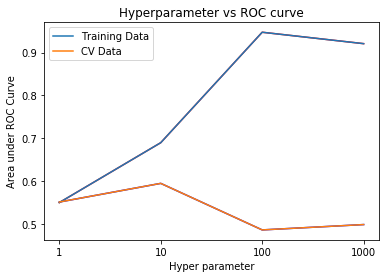

In [65]:
#Plotting the plot between Hyperparameter and ROC Curve,
from matplotlib.pyplot import *
t=[]
j=1
k=5
roc_auc_train_array=[]
roc_auc_cv_array=[]
for i in range (1,5):
    t.append(str(j))
    #t.append(str(k))
    roc_auc_train_array.append(roc_auc_train_bow[i])
    roc_auc_cv_array.append(roc_auc_cv_bow[i])
    j=j*10
    k=k*5
     
    
plt.xlabel('Hyper parameter')
plt.ylabel('Area under ROC Curve')
plot(t, roc_auc_train_array, 'r-')
plot(t, roc_auc_cv_array, 'b-')
plt.title('Hyperparameter vs ROC curve')
plt.plot(t, roc_auc_train_array, label = "Training Data")
plt.plot(t, roc_auc_cv_array, label = "CV Data") 
plt.legend() 
show()

In [66]:
#Once you find the best hyper parameter, you need to train your model-M using the best hyper-param. 
#Now, find the AUC on test data and plot the ROC curve on both train and test using model-M.


T_BOW_test.data = np.nan_to_num(T_BOW_test.data)
T_BOW_train.data = np.nan_to_num(T_BOW_train.data)
DT = DecisionTreeClassifier(max_depth =10,min_samples_split =500)#where x would coming from above plot
DT.fit(T_BOW_train,y_2)

DT_viz_bow = DecisionTreeClassifier(max_depth =3,min_samples_split =25)
DT_viz_bow.fit(T_BOW_train,y_2)
y_4=np.array(y_test)
pred = DT.predict_proba(T_BOW_test)[:,1]
pred_tr = DT.predict_proba(T_BOW_train)[:,1]
pred_viz = DT_viz_bow.predict_proba(T_BOW_test)[:,1]
fpr_test, tpr_test, thresholds = metrics.roc_curve(y_4, pred, pos_label=1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)


In [67]:
roc_auc_test

0.6003351849566266

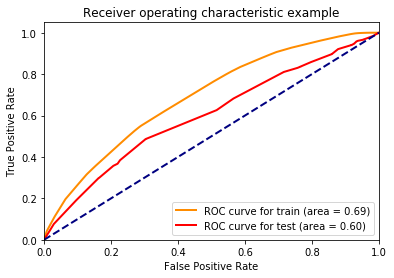

In [68]:
#Along with plotting ROC curve, you need to print the confusion matrix with predicted and original labels of test data points 
plt.figure()
lw = 2
plt.plot(fpr_train_bow[2], tpr_train_bow[2], color='darkorange',
         lw=lw, label='ROC curve for train (area = %0.2f)' % roc_auc_train_bow[2])
plt.plot(fpr_test, tpr_test, color='red',
         lw=lw, label='ROC curve for test (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 8.5, 'Predicted label')

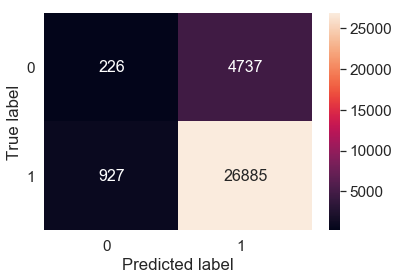

In [69]:
#Confusion Matrix for test data 


#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

#https://stackoverflow.com/questions/38015181/accuracy-score-valueerror-cant-handle-mix-of-binary-and-continuous-target
results = confusion_matrix(y_4, pred.round())  
df_cm = pd.DataFrame(results, range(2),
                  range(2))
sn.set(font_scale=1.4)#for label size
heatmap =sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')
#https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')

Text(0.5, 8.5, 'Predicted label')

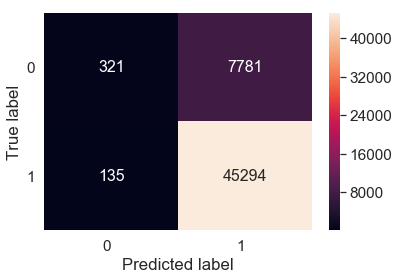

In [70]:
#Confusion Matrix for train data 


#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

#https://stackoverflow.com/questions/38015181/accuracy-score-valueerror-cant-handle-mix-of-binary-and-continuous-target
results = confusion_matrix(y_2, pred_tr.round())  
df_cm = pd.DataFrame(results, range(2),
                  range(2))
sn.set(font_scale=1.4)#for label size
heatmap =sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')
#https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')

#### 2.4.1.1 Graphviz visualization of Decision Tree on BOW,<font color='red'> SET 1</font>

In [71]:
#Feature aggregation
#https://github.com/shashimanyam/DECISION-TREE-ON-DONORSCHOOSE-DATASET/blob/master/DECISION%20TREE%20ON%20DONORSCHOOSE.ipynb


feature_agg_bow = vector1 + vector2 + vector3 + vector4 + vector5 + vector6 + vector7
feature_agg_tfidf = vector1 + vector2 + vector3 + vector4 + vector5 + vector8 + vector9
# p is price, q is quantity, t is teacher previous year projects
feature_agg_bow.append('price')
feature_agg_tfidf.append('price')
feature_agg_bow.append('teacher_previous_projects')
feature_agg_tfidf.append('teacher_previous_projects')

In [78]:
#https://datascience.stackexchange.com/questions/37428/graphviz-not-working-when-imported-inside-pydotplus-graphvizs-executables-not
import os

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

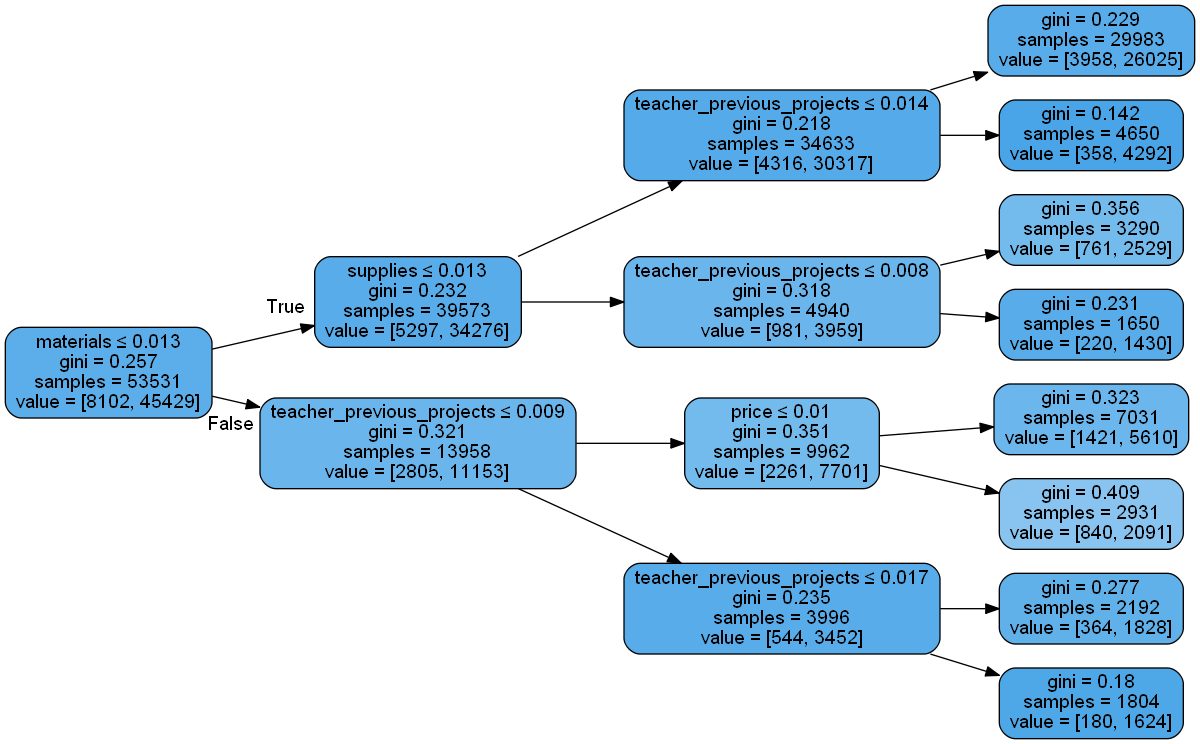

In [79]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(DT_viz_bow, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=feature_agg_bow,rotate=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

<h1>Analysis for false Positive</h1>

<h2>A. Plot the WordCloud </h2>

In [80]:
pred_viz.shape

(32775,)

In [81]:
#https://www.google.com/search?q=geeks+for+geeks+false+positive&rlz=1C1SQJL_enIN849IN849&oq=geeks+for+geeks+false+positive&aqs=chrome..69i57j33l5.6431j0j7&sourceid=chrome&ie=UTF-8
#https://github.com/pskadasi/DecisionTrees_DonorsChoose/blob/master/Copy_of_8_DonorsChoose_DT_(1).ipynb
fpi = []
for i in range(len(y_test)) :
    if (y_test.values[i] == 0) & (pred_viz[i] <= 0.9) :
        fpi.append(i)


In [82]:
fp_essay1 = []
for i in fpi :
    fp_essay1.append(X_test["essay"].values[i])

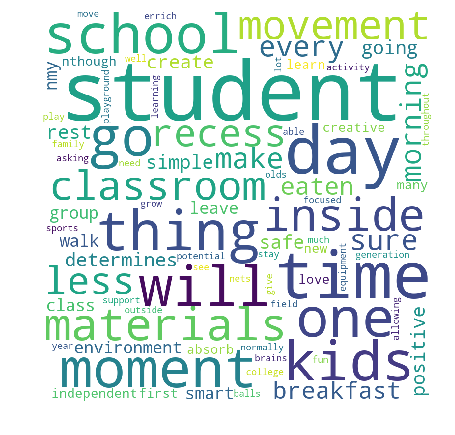

In [83]:

from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = set(STOPWORDS)
for val in fp_essay1 :
    val = str(val)
    tokens = val.split()
for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
for words in tokens :
    comment_words = comment_words + words + ' '
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords,min_font_size = 10).generate(comment_words)

plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

<h2>B.  Plot the box plot with the `price` of these `false positive data points</h2>

In [84]:
# first get the columns:
cols = X_test.columns
X_test_falsePos1 = pd.DataFrame(columns=cols)

# get the data of the false pisitives
for i in fpi : # (in fpi all the false positives data points indexes)
    
    X_test_falsePos1 = X_test_falsePos1.append(X_test.filter(items=[i], axis=0))


len(X_test_falsePos1)

4338

In [85]:
X_test_falsePos1.head(1)

Unnamed: 0       id                        teacher_id teacher_prefix  \
1      96430  p247274  1cf9bfb46a97d64802f3bf375c5b4a8a           Mrs.   

  school_state project_submitted_datetime project_grade_category  \
1           CA            1/17/2017 14:54            Grades 9-12   

                              project_title  \
1  Digital Editing for Mountain Sports Club   

                                     project_essay_1  \
1  Students from my senior economics and governme...   

                                     project_essay_2 project_essay_3  \
1  These materials help finalize a digital editin...                   

  project_essay_4                           project_resource_summary  \
1                  My students need the final touches on our digi...   

  teacher_number_of_previously_posted_projects clean_categories  \
1                                           11    Health_Sports   

  clean_subcategories  price  quantity  \
1          TeamSports  29.99       2.0   

                                               essay  
1  Students from my senior economics and governme...

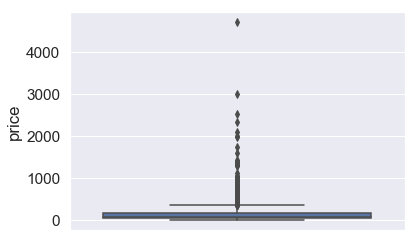

In [86]:
##Box Plot (FP 'price')
sns.boxplot(y='price', data=X_test_falsePos1)

<h3>Summary : More than 75 percentile of the projects which are falsely positive are having price around 500</h3>

<h2> C. Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</h2>

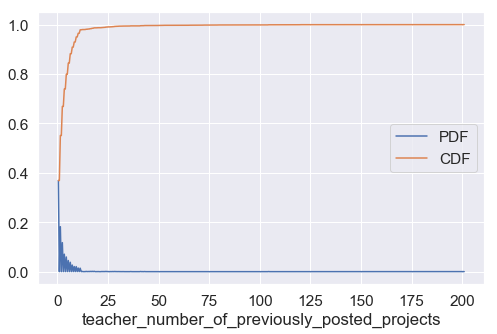

In [87]:
plt.figure(figsize=(8,5))
counts, bin_edges = np.histogram(X_test_falsePos1['teacher_number_of_previously_posted_projects'],
bins='auto', density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
pdfP, = plt.plot(bin_edges[1:], pdf)
cdfP, = plt.plot(bin_edges[1:], cdf)
plt.legend([pdfP, cdfP], ["PDF", "CDF"])
plt.xlabel('teacher_number_of_previously_posted_projects')
plt.show()

### 2.4.2 Applying Decision Trees on TFIDF,<font color='red'> SET 2</font>

In [88]:
#https://stackoverflow.com/questions/18948086/how-to-fix-nan-or-infinity-issue-for-sparse-matrix-in-python
T_TFIDF_train.data = np.nan_to_num(T_TFIDF_train.data)
T_TFIDF_cv.data = np.nan_to_num(T_TFIDF_cv.data)

#https://stats.stackexchange.com/questions/341332/how-to-scale-for-selectkbest-for-feature-selection
T_TFIDF_train.data= (T_TFIDF_train.data - T_TFIDF_train.data.min(0)) / T_TFIDF_train.data.ptp(0)
#T_BOW_cv.data= (T_BOW_cv.data - T_BOW_cv.data.min(0)) / T_BOW_cv.data.ptp(0)
#T_BOW_test.data= (T_BOW_test.data - T_BOW_test.data.min(0)) / T_BOW_test.data.ptp(0)

fpr_cv_tfidf = dict()
tpr_cv_tfidf = dict()
roc_auc_cv_tfidf = dict()
y_2=np.array(y_tr)
y_3=np.array(y_cv)
fpr_train_tfidf = dict()
tpr_train_tfidf = dict()
roc_auc_train_tfidf = dict()
j=1
k=5
for i in range(1,5):
    print(i ,":", j)
    print(i ,":", k)
    DT_tfidf = DecisionTreeClassifier(max_depth =j,min_samples_split =k)
    # fitting the model on crossvalidation train
    DT_tfidf.fit(T_TFIDF_train,y_2)
    pred_1 = DT_tfidf.predict_proba(T_TFIDF_train)[:,1]
    fpr_train_tfidf[i], tpr_train_tfidf[i], thresholds = metrics.roc_curve(y_2, pred_1, pos_label=1)
    roc_auc_train_tfidf[i] = metrics.auc(fpr_train_tfidf[i], tpr_train_tfidf[i])
    pred_2 = DT_tfidf.predict_proba(T_TFIDF_cv)[:,1]
    fpr_cv_tfidf[i], tpr_cv_tfidf[i], thresholds = metrics.roc_curve(y_3, pred_2, pos_label=1)
    roc_auc_cv_tfidf[i] = metrics.auc(fpr_cv_tfidf[i], tpr_cv_tfidf[i])
    j=j*10
    k=k*5


1 : 1
1 : 5
2 : 10
2 : 25
3 : 100
3 : 125
4 : 1000
4 : 625


In [89]:
roc_auc_train_tfidf

{1: 0.5534525015500084,
 2: 0.685163813853067,
 3: 0.9422784433535922,
 4: 0.9642739178687738}

In [90]:
roc_auc_cv_tfidf

{1: 0.5515351144998127,
 2: 0.585156362374271,
 3: 0.5078363109940993,
 4: 0.4897051047945543}

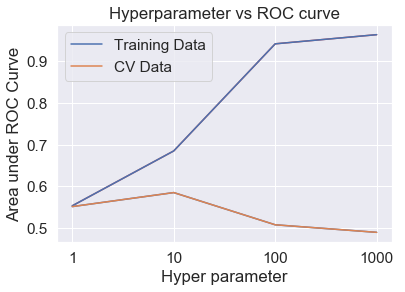

In [91]:
#Plotting the plot between Hyperparameter and ROC Curve,
from matplotlib.pyplot import *
t=[]
j=1
k=5
roc_auc_train_array=[]
roc_auc_cv_array=[]
for i in range (1,5):
    t.append(str(j))
    #t.append(str(k))
    roc_auc_train_array.append(roc_auc_train_tfidf[i])
    roc_auc_cv_array.append(roc_auc_cv_tfidf[i])
    j=j*10
    k=k*5
     
    
plt.xlabel('Hyper parameter')
plt.ylabel('Area under ROC Curve')
plot(t, roc_auc_train_array, 'r-')
plot(t, roc_auc_cv_array, 'b-')
plt.title('Hyperparameter vs ROC curve')
plt.plot(t, roc_auc_train_array, label = "Training Data")
plt.plot(t, roc_auc_cv_array, label = "CV Data") 
plt.legend() 
show()

In [92]:
#Once you find the best hyper parameter, you need to train your model-M using the best hyper-param. 
#Now, find the AUC on test data and plot the ROC curve on both train and test using model-M.


T_TFIDF_test.data = np.nan_to_num(T_TFIDF_test.data)
DT = DecisionTreeClassifier(max_depth =10,min_samples_split =25)#where x would coming from above plot
DT.fit(T_TFIDF_train,y_2)

DT_viz_bow = DecisionTreeClassifier(max_depth =3,min_samples_split =25)
DT_viz_bow.fit(T_TFIDF_train,y_2)
y_4=np.array(y_test)
pred = DT.predict_proba(T_TFIDF_test)[:,1]
pred_tr = DT.predict_proba(T_TFIDF_train)[:,1]
pred_viz = DT_viz_bow.predict_proba(T_TFIDF_test)[:,1]
fpr_test, tpr_test, thresholds = metrics.roc_curve(y_4, pred, pos_label=1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)


In [93]:
roc_auc_test

0.5849443439339795

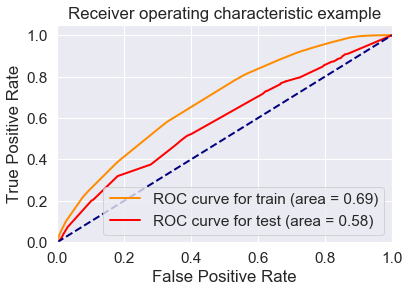

In [94]:
#Along with plotting ROC curve, you need to print the confusion matrix with predicted and original labels of test data points 
plt.figure()
lw = 2
plt.plot(fpr_train_tfidf[2], tpr_train_tfidf[2], color='darkorange',
         lw=lw, label='ROC curve for train (area = %0.2f)' % roc_auc_train_tfidf[2])
plt.plot(fpr_test, tpr_test, color='red',
         lw=lw, label='ROC curve for test (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 8.5, 'Predicted label')

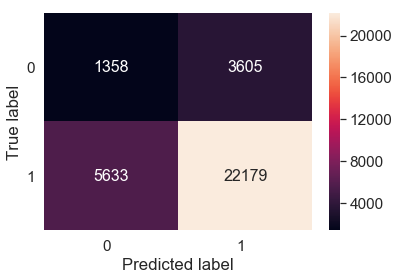

In [95]:
#Confusion Matrix


#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

#https://stackoverflow.com/questions/38015181/accuracy-score-valueerror-cant-handle-mix-of-binary-and-continuous-target
results = confusion_matrix(y_4, pred.round())  
df_cm = pd.DataFrame(results, range(2),
                  range(2))
sn.set(font_scale=1.4)#for label size
heatmap =sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')
#https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')

Text(0.5, 8.5, 'Predicted label')

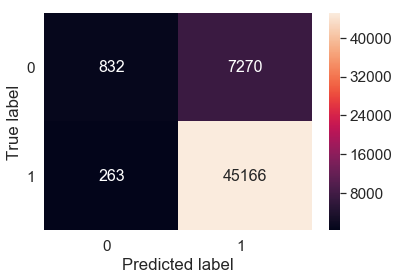

In [96]:
#Confusion Matrix for train data 


#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

#https://stackoverflow.com/questions/38015181/accuracy-score-valueerror-cant-handle-mix-of-binary-and-continuous-target
results = confusion_matrix(y_2, pred_tr.round())  
df_cm = pd.DataFrame(results, range(2),
                  range(2))
sn.set(font_scale=1.4)#for label size
heatmap =sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')
#https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')

#### 2.4.2.1 Graphviz visualization of Decision Tree on TFIDF,<font color='red'> SET 2</font>

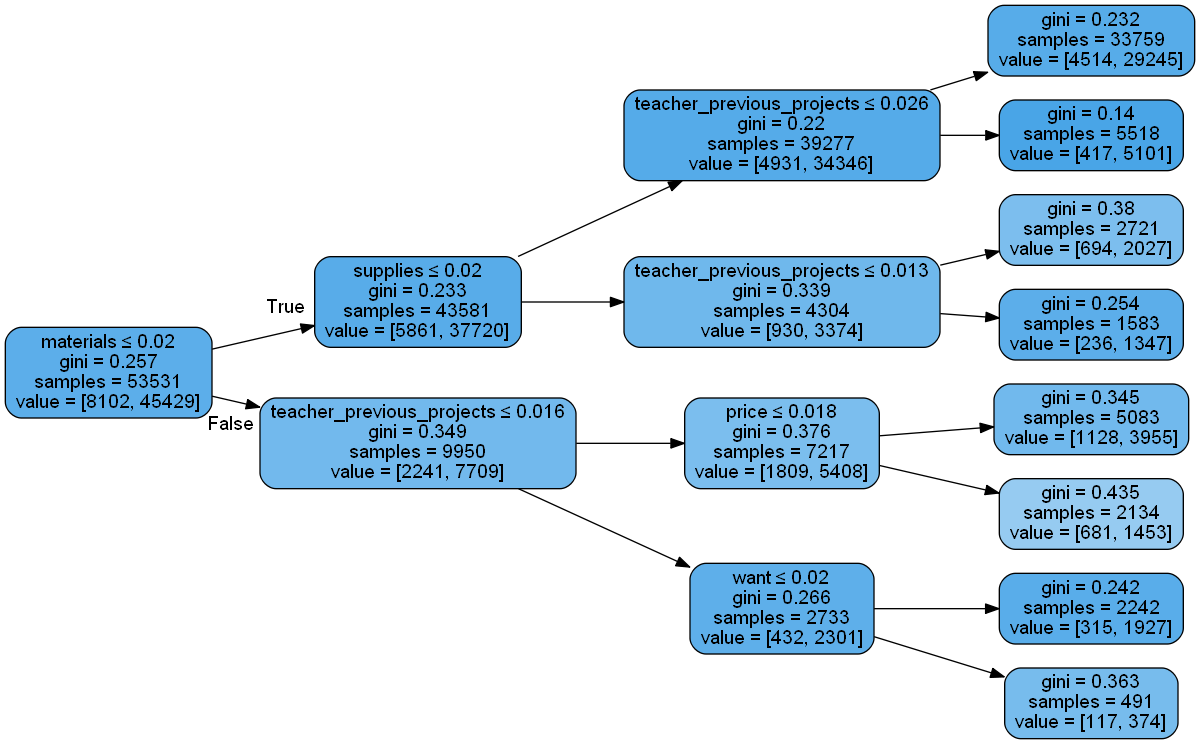

In [97]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(DT_viz_bow, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=feature_agg_tfidf,rotate=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

<h1>Analysis for false Positive</h1>

<h2>A. Plot the WordCloud </h2>

In [98]:
pred_viz.shape

(32775,)

In [99]:
#https://www.google.com/search?q=geeks+for+geeks+false+positive&rlz=1C1SQJL_enIN849IN849&oq=geeks+for+geeks+false+positive&aqs=chrome..69i57j33l5.6431j0j7&sourceid=chrome&ie=UTF-8
#https://github.com/pskadasi/DecisionTrees_DonorsChoose/blob/master/Copy_of_8_DonorsChoose_DT_(1).ipynb
fpi = []
for i in range(len(y_test)) :
    if (y_test.values[i] == 0) & (pred_viz[i] <= 0.9) :
        fpi.append(i)

		
fp_essay1 = []
for i in fpi :
    fp_essay1.append(X_test["essay"].values[i])


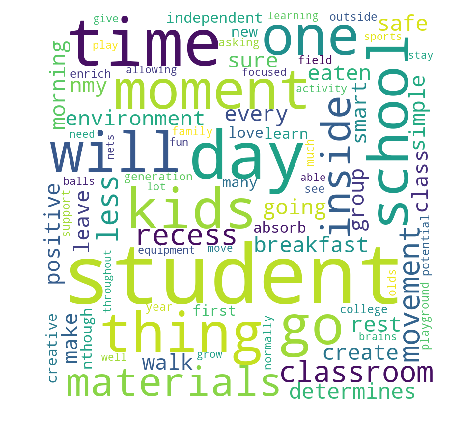

In [100]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = set(STOPWORDS)
for val in fp_essay1 :
    val = str(val)
    tokens = val.split()
for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
for words in tokens :
    comment_words = comment_words + words + ' '
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords,min_font_size = 10).generate(comment_words)

plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


<h2>B.  Plot the box plot with the `price` of these `false positive data points</h2>

In [101]:
# first get the columns:
cols = X_test.columns
X_test_falsePos1 = pd.DataFrame(columns=cols)

# get the data of the false pisitives
for i in fpi : # (in fpi all the false positives data points indexes)
    
    X_test_falsePos1 = X_test_falsePos1.append(X_test.filter(items=[i], axis=0))


len(X_test_falsePos1)

4575

In [102]:
X_test_falsePos1.head(1)

Unnamed: 0       id                        teacher_id teacher_prefix  \
1      96430  p247274  1cf9bfb46a97d64802f3bf375c5b4a8a           Mrs.   

  school_state project_submitted_datetime project_grade_category  \
1           CA            1/17/2017 14:54            Grades 9-12   

                              project_title  \
1  Digital Editing for Mountain Sports Club   

                                     project_essay_1  \
1  Students from my senior economics and governme...   

                                     project_essay_2 project_essay_3  \
1  These materials help finalize a digital editin...                   

  project_essay_4                           project_resource_summary  \
1                  My students need the final touches on our digi...   

  teacher_number_of_previously_posted_projects clean_categories  \
1                                           11    Health_Sports   

  clean_subcategories  price  quantity  \
1          TeamSports  29.99       2.0   

                                               essay  
1  Students from my senior economics and governme...

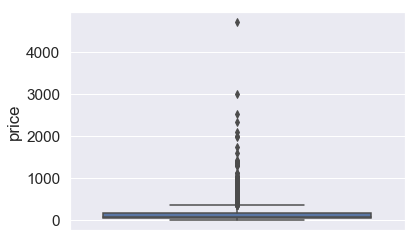

In [103]:
##Box Plot (FP 'price')
sns.boxplot(y='price', data=X_test_falsePos1)

<h2> C. Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</h2>

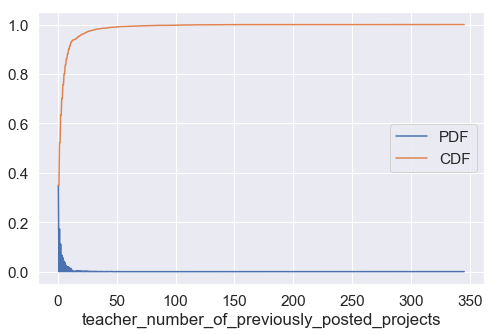

In [104]:
plt.figure(figsize=(8,5))
counts, bin_edges = np.histogram(X_test_falsePos1['teacher_number_of_previously_posted_projects'],
bins='auto', density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
pdfP, = plt.plot(bin_edges[1:], pdf)
cdfP, = plt.plot(bin_edges[1:], cdf)
plt.legend([pdfP, cdfP], ["PDF", "CDF"])
plt.xlabel('teacher_number_of_previously_posted_projects')
plt.show()


### 2.4.3 Applying Decision Trees on AVG W2V,<font color='red'> SET 3</font>

In [105]:
#https://stackoverflow.com/questions/18948086/how-to-fix-nan-or-infinity-issue-for-sparse-matrix-in-python
T_avfWtoV_train.data = np.nan_to_num(T_avfWtoV_train.data)
T_avfWtoV_cv.data = np.nan_to_num(T_avfWtoV_cv.data)
fpr_cv_avg_W2V = dict()
tpr_cv_avg_W2V = dict()
roc_auc_cv_avg_W2V = dict()
y_2=np.array(y_tr)
y_3=np.array(y_cv)
fpr_train_avg_W2V = dict()
tpr_train_avg_W2V = dict()
roc_auc_train_avg_W2V = dict()
j=1
k=5
for i in range(1,5):
    print(i ,":", j)
    print(i ,":", k)
    DT_avgW2V = DecisionTreeClassifier(max_depth =j,min_samples_split =k)
    # fitting the model on crossvalidation train
    DT_avgW2V.fit(T_avfWtoV_train,y_2)
    pred_1_avg_W2V = DT_avgW2V.predict_proba(T_avfWtoV_train)[:,1]
    fpr_train_avg_W2V[i], tpr_train_avg_W2V[i], thresholds = metrics.roc_curve(y_2, pred_1_avg_W2V, pos_label=1)
    roc_auc_train_avg_W2V[i] = metrics.auc(fpr_train_avg_W2V[i], tpr_train_avg_W2V[i])
    pred_2_avg_W2V = DT_avgW2V.predict_proba(T_avfWtoV_cv)[:,1]
    fpr_cv_avg_W2V[i], tpr_cv_avg_W2V[i], thresholds = metrics.roc_curve(y_3, pred_2_avg_W2V, pos_label=1)
    roc_auc_cv_avg_W2V[i] = metrics.auc(fpr_cv_avg_W2V[i], tpr_cv_avg_W2V[i])
    j=j*10
    k=k*5

1 : 1
1 : 5
2 : 10
2 : 25
3 : 100
3 : 125
4 : 1000
4 : 625


In [106]:
roc_auc_train_avg_W2V

{1: 0.5604962727882989,
 2: 0.7262415850702417,
 3: 0.9351485339747361,
 4: 0.8241139888921696}

In [107]:
roc_auc_cv_avg_W2V

{1: 0.5619421110920755,
 2: 0.6021078518178355,
 3: 0.5657195599189448,
 4: 0.5970724132553278}

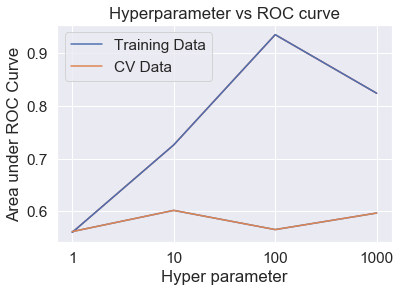

In [108]:
#Plotting the plot between Hyperparameter and ROC Curve,
from matplotlib.pyplot import *
t=[]
j=1
k=5
roc_auc_train_array=[]
roc_auc_cv_array=[]
for i in range (1,5):
    t.append(str(j))
    #t.append(str(k))
    roc_auc_train_array.append(roc_auc_train_avg_W2V[i])
    roc_auc_cv_array.append(roc_auc_cv_avg_W2V[i])
    j=j*10
    k=k*5
     
    
plt.xlabel('Hyper parameter')
plt.ylabel('Area under ROC Curve')
plot(t, roc_auc_train_array, 'r-')
plot(t, roc_auc_cv_array, 'b-')
plt.title('Hyperparameter vs ROC curve')
plt.plot(t, roc_auc_train_array, label = "Training Data")
plt.plot(t, roc_auc_cv_array, label = "CV Data") 
plt.legend() 
show()

In [109]:
#Once you find the best hyper parameter, you need to train your model-M using the best hyper-param. 
#Now, find the AUC on test data and plot the ROC curve on both train and test using model-M.


T_avfWtoV_test.data = np.nan_to_num(T_avfWtoV_test.data)
DT = DecisionTreeClassifier(max_depth =10,min_samples_split =25)#where x would coming from above plot
DT.fit(T_avfWtoV_train,y_2)
y_4=np.array(y_test)
pred = DT.predict_proba(T_avfWtoV_test)[:,1]
pred_tr = DT.predict_proba(T_avfWtoV_train)[:,1]
fpr_test, tpr_test, thresholds = metrics.roc_curve(y_4, pred, pos_label=1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)


In [110]:
roc_auc_test

0.6038950639449312

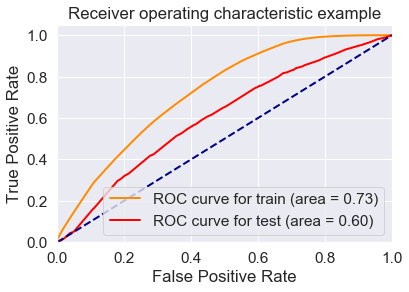

In [111]:
#Along with plotting ROC curve, you need to print the confusion matrix with predicted and original labels of test data points 
plt.figure()
lw = 2
plt.plot(fpr_train_avg_W2V[2], tpr_train_avg_W2V[2], color='darkorange',
         lw=lw, label='ROC curve for train (area = %0.2f)' % roc_auc_train_avg_W2V[2])
plt.plot(fpr_test, tpr_test, color='red',
         lw=lw, label='ROC curve for test (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 8.5, 'Predicted label')

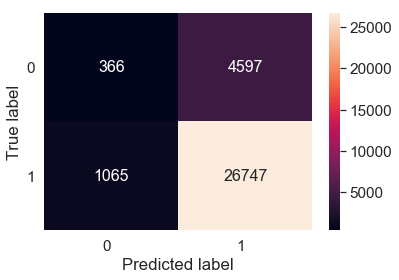

In [112]:
#Confusion Matrix


#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

#https://stackoverflow.com/questions/38015181/accuracy-score-valueerror-cant-handle-mix-of-binary-and-continuous-target
results = confusion_matrix(y_4, pred.round())  
df_cm = pd.DataFrame(results, range(2),
                  range(2))
sn.set(font_scale=1.4)#for label size
heatmap =sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')
#https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')

Text(0.5, 8.5, 'Predicted label')

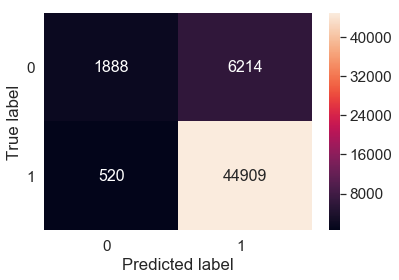

In [113]:
#Confusion Matrix for train data 


#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

#https://stackoverflow.com/questions/38015181/accuracy-score-valueerror-cant-handle-mix-of-binary-and-continuous-target
results = confusion_matrix(y_2, pred_tr.round())  
df_cm = pd.DataFrame(results, range(2),
                  range(2))
sn.set(font_scale=1.4)#for label size
heatmap =sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')
#https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')

<h1>Analysis for false Positive</h1>

<h2>A. Plot the WordCloud </h2>

In [114]:
#https://www.google.com/search?q=geeks+for+geeks+false+positive&rlz=1C1SQJL_enIN849IN849&oq=geeks+for+geeks+false+positive&aqs=chrome..69i57j33l5.6431j0j7&sourceid=chrome&ie=UTF-8
#https://github.com/pskadasi/DecisionTrees_DonorsChoose/blob/master/Copy_of_8_DonorsChoose_DT_(1).ipynb
fpi = []
for i in range(len(y_test)) :
    if (y_test.values[i] == 0) & (pred[i] <= 0.9) :
        fpi.append(i)

fp_essay1 = []
for i in fpi :
    fp_essay1.append(X_test["essay"].values[i])


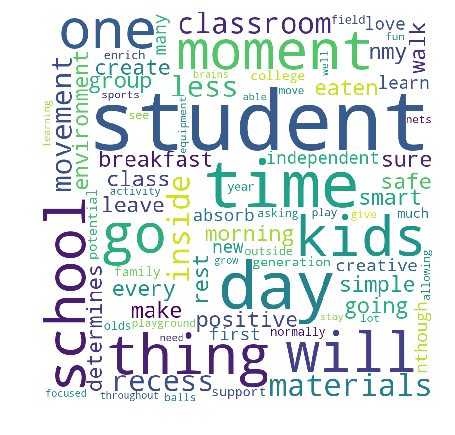

In [115]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = set(STOPWORDS)
for val in fp_essay1 :
    val = str(val)
    tokens = val.split()
for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
for words in tokens :
    comment_words = comment_words + words + ' '
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords,min_font_size = 10).generate(comment_words)

plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

<h2>B.  Plot the box plot with the `price` of these `false positive data points</h2>

In [116]:
# first get the columns:
cols = X_test.columns
X_test_falsePos1 = pd.DataFrame(columns=cols)

# get the data of the false pisitives
for i in fpi : # (in fpi all the false positives data points indexes)
    
    X_test_falsePos1 = X_test_falsePos1.append(X_test.filter(items=[i], axis=0))


len(X_test_falsePos1)


3111

In [117]:
X_test_falsePos1.head(1)

Unnamed: 0       id                        teacher_id teacher_prefix  \
26      44965  p024850  81f2dd0dc51b54277b1cc0127d022e56            Ms.   

   school_state project_submitted_datetime project_grade_category  \
26           CA           11/30/2016 21:33          Grades PreK-2   

                         project_title  \
26  Educational Tools for All Learners   

                                      project_essay_1  \
26  All of the students in my classroom are identi...   

                                      project_essay_2 project_essay_3  \
26  With a classroom full of children with varying...                   

   project_essay_4                           project_resource_summary  \
26                  My students need interactive and engaging toys...   

   teacher_number_of_previously_posted_projects              clean_categories  \
26                                            1  AppliedLearning SpecialNeeds   

              clean_subcategories  price  quantity  \
26  EarlyDevelopment SpecialNeeds  72.97       7.0   

                                                essay  
26  All of the students in my classroom are identi...

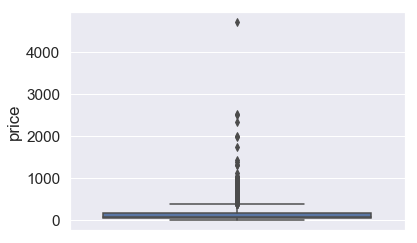

In [118]:
##Box Plot (FP 'price')
sns.boxplot(y='price', data=X_test_falsePos1)


<h2> C. Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</h2>

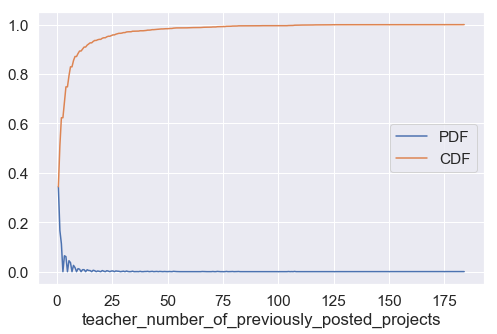

In [119]:
plt.figure(figsize=(8,5))
counts, bin_edges = np.histogram(X_test_falsePos1['teacher_number_of_previously_posted_projects'],
bins='auto', density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
pdfP, = plt.plot(bin_edges[1:], pdf)
cdfP, = plt.plot(bin_edges[1:], cdf)
plt.legend([pdfP, cdfP], ["PDF", "CDF"])
plt.xlabel('teacher_number_of_previously_posted_projects')
plt.show()

### 2.4.4 Applying Decision Trees on TFIDF W2V,<font color='red'> SET 4</font>

In [120]:
#https://stackoverflow.com/questions/18948086/how-to-fix-nan-or-infinity-issue-for-sparse-matrix-in-python
T_tfidfWtoV_train.data = np.nan_to_num(T_tfidfWtoV_train.data)
T_tfidfWtoV_cv.data = np.nan_to_num(T_tfidfWtoV_cv.data)
fpr_cv_tfidf_W2V = dict()
tpr_cv_tfidf_W2V = dict()
roc_auc_cv_tfidf_W2V = dict()
y_2=np.array(y_tr)
y_3=np.array(y_cv)
fpr_train_tfidf_W2V = dict()
tpr_train_tfidf_W2V = dict()
roc_auc_train_tfidf_W2V = dict()
j=1
k=5
for i in range(1,5):
    print(i ,":", j)
    print(i ,":", k)
    DT_tfidfWtoV = DecisionTreeClassifier(max_depth =j,min_samples_split =k)
    # fitting the model on crossvalidation train
    DT_tfidfWtoV.fit(T_tfidfWtoV_train,y_2)
    pred_1_tfidf_W2V = DT_tfidfWtoV.predict_proba(T_tfidfWtoV_train)[:,1]
    fpr_train_tfidf_W2V[i], tpr_train_tfidf_W2V[i], thresholds = metrics.roc_curve(y_2, pred_1_tfidf_W2V, pos_label=1)
    roc_auc_train_tfidf_W2V[i] = metrics.auc(fpr_train_tfidf_W2V[i], tpr_train_tfidf_W2V[i])
    pred_2_tfidf_W2V = DT_tfidfWtoV.predict_proba(T_tfidfWtoV_cv)[:,1]
    fpr_cv_tfidf_W2V[i], tpr_cv_tfidf_W2V[i], thresholds = metrics.roc_curve(y_3, pred_2_tfidf_W2V, pos_label=1)
    roc_auc_cv_tfidf_W2V[i] = metrics.auc(fpr_cv_tfidf_W2V[i], tpr_cv_tfidf_W2V[i])
    j=j*10
    k=k*5

1 : 1
1 : 5
2 : 10
2 : 25
3 : 100
3 : 125
4 : 1000
4 : 625


In [121]:
roc_auc_train_tfidf_W2V

{1: 0.5564291313401667,
 2: 0.74215587041922,
 3: 0.9315870209257553,
 4: 0.80581678695577}

In [122]:
roc_auc_cv_tfidf_W2V

{1: 0.5557744367023516,
 2: 0.6023034049817372,
 3: 0.5585642718681001,
 4: 0.5930772111414919}

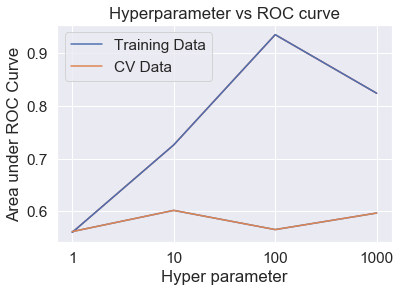

In [123]:
#Plotting the plot between Hyperparameter and ROC Curve,
from matplotlib.pyplot import *
t=[]
j=1
k=5
roc_auc_train_array=[]
roc_auc_cv_array=[]
for i in range (1,5):
    t.append(str(j))
    #t.append(str(k))
    roc_auc_train_array.append(roc_auc_train_avg_W2V[i])
    roc_auc_cv_array.append(roc_auc_cv_avg_W2V[i])
    j=j*10
    k=k*5
     
    
plt.xlabel('Hyper parameter')
plt.ylabel('Area under ROC Curve')
plot(t, roc_auc_train_array, 'r-')
plot(t, roc_auc_cv_array, 'b-')
plt.title('Hyperparameter vs ROC curve')
plt.plot(t, roc_auc_train_array, label = "Training Data")
plt.plot(t, roc_auc_cv_array, label = "CV Data") 
plt.legend() 
show()

In [124]:
#Once you find the best hyper parameter, you need to train your model-M using the best hyper-param. 
#Now, find the AUC on test data and plot the ROC curve on both train and test using model-M.


T_tfidfWtoV_test.data = np.nan_to_num(T_tfidfWtoV_test.data)
DT = DecisionTreeClassifier(max_depth =10,min_samples_split =25)#where x would coming from above plot
DT.fit(T_tfidfWtoV_train,y_2)
y_4=np.array(y_test)
pred = DT.predict_proba(T_tfidfWtoV_test)[:,1]
pred_tr = DT.predict_proba(T_tfidfWtoV_train)[:,1]
fpr_test, tpr_test, thresholds = metrics.roc_curve(y_4, pred, pos_label=1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)


In [125]:
roc_auc_test

0.6031219294025609

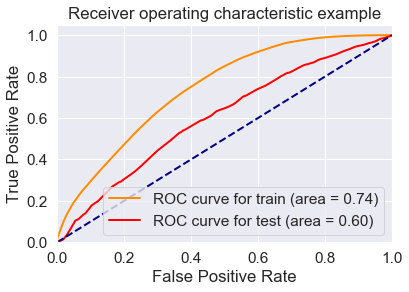

In [126]:
#Along with plotting ROC curve, you need to print the confusion matrix with predicted and original labels of test data points 
plt.figure()
lw = 2
plt.plot(fpr_train_tfidf_W2V[2], tpr_train_tfidf_W2V[2], color='darkorange',
         lw=lw, label='ROC curve for train (area = %0.2f)' % roc_auc_train_tfidf_W2V[2])
plt.plot(fpr_test, tpr_test, color='red',
         lw=lw, label='ROC curve for test (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 8.5, 'Predicted label')

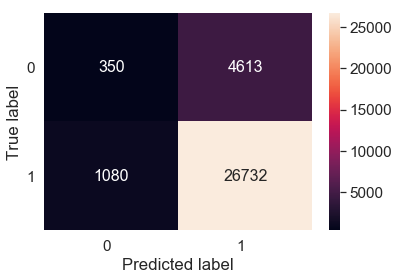

In [127]:
#Confusion Matrix


#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

#https://stackoverflow.com/questions/38015181/accuracy-score-valueerror-cant-handle-mix-of-binary-and-continuous-target
results = confusion_matrix(y_4, pred.round())  
df_cm = pd.DataFrame(results, range(2),
                  range(2))
sn.set(font_scale=1.4)#for label size
heatmap =sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')
#https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')

Text(0.5, 8.5, 'Predicted label')

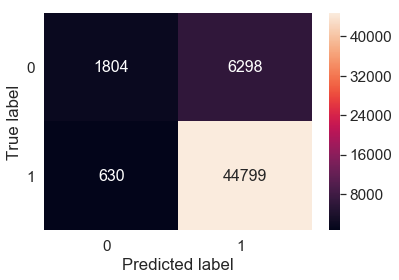

In [128]:
#Confusion Matrix for train data 


#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

#https://stackoverflow.com/questions/38015181/accuracy-score-valueerror-cant-handle-mix-of-binary-and-continuous-target
results = confusion_matrix(y_2, pred_tr.round())  
df_cm = pd.DataFrame(results, range(2),
                  range(2))
sn.set(font_scale=1.4)#for label size
heatmap =sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')
#https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')

<h1>Analysis for false Positive</h1>

<h2>A. Plot the WordCloud </h2>

In [129]:
#https://www.google.com/search?q=geeks+for+geeks+false+positive&rlz=1C1SQJL_enIN849IN849&oq=geeks+for+geeks+false+positive&aqs=chrome..69i57j33l5.6431j0j7&sourceid=chrome&ie=UTF-8
#https://github.com/pskadasi/DecisionTrees_DonorsChoose/blob/master/Copy_of_8_DonorsChoose_DT_(1).ipynb
fpi = []
for i in range(len(y_test)) :
    if (y_test.values[i] == 0) & (pred[i] <= 0.9) :
        fpi.append(i)
        
fp_essay1 = []
for i in fpi :
    fp_essay1.append(X_test["essay"].values[i])


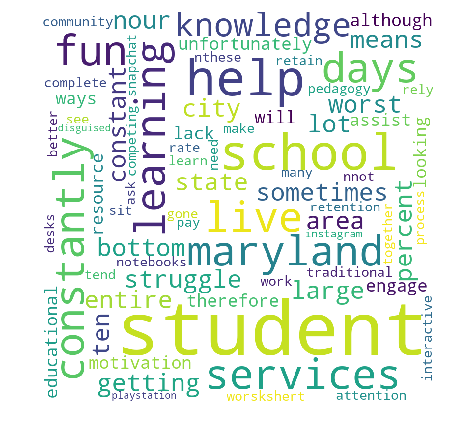

In [130]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = set(STOPWORDS)
for val in fp_essay1 :
    val = str(val)
    tokens = val.split()
for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
for words in tokens :
    comment_words = comment_words + words + ' '
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords,min_font_size = 10).generate(comment_words)

plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

<h2>B.  Plot the box plot with the `price` of these `false positive data points</h2>

In [131]:
# first get the columns:
cols = X_test.columns
X_test_falsePos1 = pd.DataFrame(columns=cols)

# get the data of the false pisitives
for i in fpi : # (in fpi all the false positives data points indexes)
    
    X_test_falsePos1 = X_test_falsePos1.append(X_test.filter(items=[i], axis=0))

len(X_test_falsePos1)


3139

In [132]:
X_test_falsePos1.head(1)

Unnamed: 0       id                        teacher_id teacher_prefix  \
9     143656  p084959  3ad96af316f7b506130a70589038a515           Mrs.   

  school_state project_submitted_datetime project_grade_category  \
9           LA            3/16/2017 15:40             Grades 3-5   

        project_title                                    project_essay_1  \
9  Pick How You LEARN  I teach a wonderful group of 5th graders who a...   

                                     project_essay_2 project_essay_3  \
9  Next  year  my  5th graders will be piloting f...                   

  project_essay_4                           project_resource_summary  \
9                  My students need a sofa and a table to make fl...   

  teacher_number_of_previously_posted_projects clean_categories  \
9                                            7   History_Civics   

  clean_subcategories   price  quantity  \
9   History_Geography  287.67       3.0   

                                               essay  
9  I teach a wonderful group of 5th graders who a...

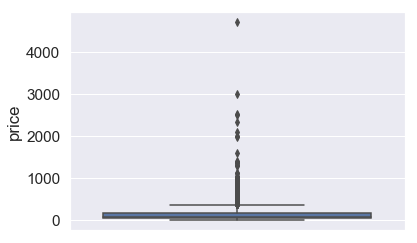

In [133]:
##Box Plot (FP 'price')
sns.boxplot(y='price', data=X_test_falsePos1)

<h2> C. Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</h2>

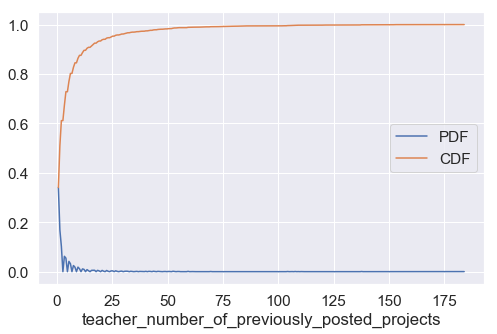

In [134]:
plt.figure(figsize=(8,5))
counts, bin_edges = np.histogram(X_test_falsePos1['teacher_number_of_previously_posted_projects'],
bins='auto', density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
pdfP, = plt.plot(bin_edges[1:], pdf)
cdfP, = plt.plot(bin_edges[1:], cdf)
plt.legend([pdfP, cdfP], ["PDF", "CDF"])
plt.xlabel('teacher_number_of_previously_posted_projects')
plt.show()


<h2>2.5 [Task-2]Getting top 5k features using `feature_importances_`</h2>

In [137]:
dt2 = DecisionTreeClassifier(class_weight = 'balanced')
parameters = {'max_depth': [5, 10, 50, 100], 'min_samples_split': [50,100,200, 500]}
clf2 = GridSearchCV(dt2, parameters, cv=3, scoring='roc_auc',return_train_score=True)
se2 = clf2.fit(T_TFIDF_train, y_tr)

In [136]:
#https://stackoverflow.com/questions/47111434/randomforestregressor-and-feature-importances-error
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
def selectKImportance(model, X, k=5):
    return X[:,model.best_estimator_.feature_importances_.argsort()[::-1][:k]]

In [138]:
xtr = T_TFIDF_train.tocsr()
xtrcv=T_TFIDF_cv.tocsr()
xtre = T_TFIDF_test.tocsr()

In [139]:
# for tf-idf set 2
X_set5_train = selectKImportance(clf2, xtr,5000)
X_set5_cv = selectKImportance(clf2, xtrcv,5000)
X_set5_test = selectKImportance(clf2, xtre, 5000)

print(X_set5_train.shape)
print(X_set5_cv.shape)
print(X_set5_test.shape)

(53531, 5000)
(22942, 5000)
(32775, 5000)


In [140]:
#https://stackoverflow.com/questions/18948086/how-to-fix-nan-or-infinity-issue-for-sparse-matrix-in-python
X_set5_train.data = np.nan_to_num(X_set5_train.data)
X_set5_cv.data = np.nan_to_num(X_set5_cv.data)

#https://stats.stackexchange.com/questions/341332/how-to-scale-for-selectkbest-for-feature-selection
X_set5_train.data= (X_set5_train.data - X_set5_train.data.min(0)) / X_set5_train.data.ptp(0)
#T_BOW_cv.data= (T_BOW_cv.data - T_BOW_cv.data.min(0)) / T_BOW_cv.data.ptp(0)
#T_BOW_test.data= (T_BOW_test.data - T_BOW_test.data.min(0)) / T_BOW_test.data.ptp(0)

fpr_cv_tfidf = dict()
tpr_cv_tfidf = dict()
roc_auc_cv_tfidf = dict()
y_2=np.array(y_tr)
y_3=np.array(y_cv)
fpr_train_tfidf = dict()
tpr_train_tfidf = dict()
roc_auc_train_tfidf = dict()
j=1
k=5
for i in range(1,5):
    print(i ,":", j)
    print(i ,":", k)
    DT_tfidf = DecisionTreeClassifier(max_depth =j,min_samples_split =k)
    # fitting the model on crossvalidation train
    DT_tfidf.fit(X_set5_train,y_2)
    pred_1 = DT_tfidf.predict_proba(X_set5_train)[:,1]
    fpr_train_tfidf[i], tpr_train_tfidf[i], thresholds = metrics.roc_curve(y_2, pred_1, pos_label=1)
    roc_auc_train_tfidf[i] = metrics.auc(fpr_train_tfidf[i], tpr_train_tfidf[i])
    pred_2 = DT_tfidf.predict_proba(X_set5_cv)[:,1]
    fpr_cv_tfidf[i], tpr_cv_tfidf[i], thresholds = metrics.roc_curve(y_3, pred_2, pos_label=1)
    roc_auc_cv_tfidf[i] = metrics.auc(fpr_cv_tfidf[i], tpr_cv_tfidf[i])
    j=j*10
    k=k*5

1 : 1
1 : 5
2 : 10
2 : 25
3 : 100
3 : 125
4 : 1000
4 : 625


In [141]:
roc_auc_train_tfidf

{1: 0.5534525015500084,
 2: 0.6868680609512174,
 3: 0.9247707063257973,
 4: 0.9454602674557951}

In [142]:
roc_auc_cv_tfidf

{1: 0.5515351144998127,
 2: 0.5710567650128424,
 3: 0.5160698527426313,
 4: 0.48671075515066864}

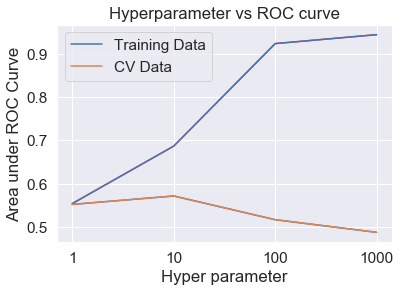

In [143]:
#Plotting the plot between Hyperparameter and ROC Curve,
from matplotlib.pyplot import *
t=[]
j=1
k=5
roc_auc_train_array=[]
roc_auc_cv_array=[]
for i in range (1,5):
    t.append(str(j))
    #t.append(str(k))
    roc_auc_train_array.append(roc_auc_train_tfidf[i])
    roc_auc_cv_array.append(roc_auc_cv_tfidf[i])
    j=j*10
    k=k*5

plt.xlabel('Hyper parameter')
plt.ylabel('Area under ROC Curve')
plot(t, roc_auc_train_array, 'r-')
plot(t, roc_auc_cv_array, 'b-')
plt.title('Hyperparameter vs ROC curve')
plt.plot(t, roc_auc_train_array, label = "Training Data")
plt.plot(t, roc_auc_cv_array, label = "CV Data") 
plt.legend() 
show()

In [144]:
#Once you find the best hyper parameter, you need to train your model-M using the best hyper-param. 
#Now, find the AUC on test data and plot the ROC curve on both train and test using model-M.


X_set5_test.data = np.nan_to_num(X_set5_test.data)
DT = DecisionTreeClassifier(max_depth =10,min_samples_split =25)#where x would coming from above plot
DT.fit(X_set5_train,y_2)

DT_viz_bow = DecisionTreeClassifier(max_depth =3,min_samples_split =25)
DT_viz_bow.fit(X_set5_train,y_2)
y_4=np.array(y_test)
pred = DT.predict_proba(X_set5_test)[:,1]
pred_tr = DT.predict_proba(X_set5_train)[:,1]
pred_viz = DT_viz_bow.predict_proba(X_set5_test)[:,1]
fpr_test, tpr_test, thresholds = metrics.roc_curve(y_4, pred, pos_label=1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)


In [145]:
roc_auc_test

0.5857682352066009

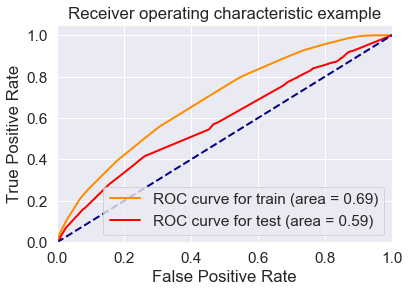

In [146]:
#Along with plotting ROC curve, you need to print the confusion matrix with predicted and original labels of test data points 
plt.figure()
lw = 2
plt.plot(fpr_train_tfidf[2], tpr_train_tfidf[2], color='darkorange',
         lw=lw, label='ROC curve for train (area = %0.2f)' % roc_auc_train_tfidf[2])
plt.plot(fpr_test, tpr_test, color='red',
         lw=lw, label='ROC curve for test (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 8.5, 'Predicted label')

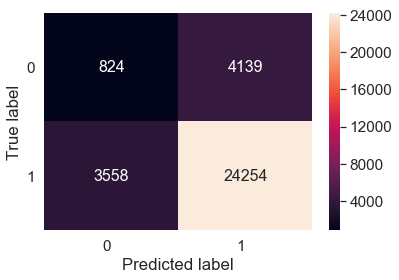

In [147]:
#Confusion Matrix


#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

#https://stackoverflow.com/questions/38015181/accuracy-score-valueerror-cant-handle-mix-of-binary-and-continuous-target
results = confusion_matrix(y_4, pred.round())  
df_cm = pd.DataFrame(results, range(2),
                  range(2))
sn.set(font_scale=1.4)#for label size
heatmap =sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')
#https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')


Text(0.5, 8.5, 'Predicted label')

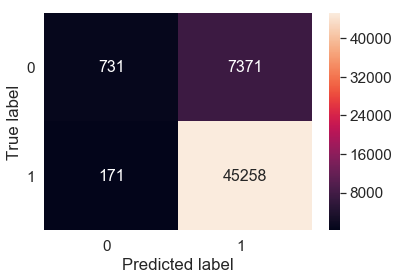

In [148]:
#Confusion Matrix for train data 


#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

#https://stackoverflow.com/questions/38015181/accuracy-score-valueerror-cant-handle-mix-of-binary-and-continuous-target
results = confusion_matrix(y_2, pred_tr.round())  
df_cm = pd.DataFrame(results, range(2),
                  range(2))
sn.set(font_scale=1.4)#for label size
heatmap =sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')
#https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')